In [1]:
from sympy import *
import numpy as np
init_printing()

Define symbols
----

Primary
--

In [2]:
w, c, d = symbols('\omega, c_0, d')

In [3]:
ax, ay, az = symbols('a_x, a_y, a_z')
kx, ky, kz = symbols('k_x, k_y, k_z')
opticAxis = Matrix([
        ax, ay, az
    ])
eps_per, eps_par = symbols('\epsilon_\parallel, \epsilon_\perp')
eps_iso = eps_per
eps_ani = eps_par - eps_per

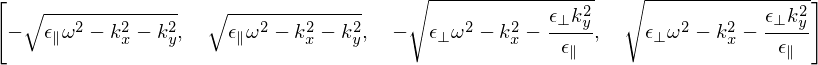

In [4]:
e_xx, e_yy, e_zz, e_xy, e_yz, e_xz = symbols('\epsilon_{xx}, \epsilon_{yy}, \epsilon_{zz},\epsilon_{xy},\
                                             \epsilon_{yz}, \epsilon_{xz}')
M = Matrix([[w**2*e_xx -ky**2 - kz**2, w**2*e_xy + kx*ky, w**2*e_xz + kx*kz], 
           [w**2*e_xy + kx*ky, w**2*e_yy - kx**2 - kz**2, w**2*e_yz + ky*kz], 
           [w**2*e_xz + kx*kz, w**2*e_yz + kz*ky, w**2*e_zz -kx**2 - ky**2]]).subs({e_xy:0, e_xz:0, e_yz:0, 
                                                                                    e_xx:eps_per, e_yy:eps_par,
                                                                                    e_zz:eps_per })
A = factor(det(M), kz)
Sol = solve(Eq(A, 0), kz)
Sol

In [5]:
k_1 = Matrix([kx, ky, Sol[0]])
k_2 = Matrix([kx, ky, Sol[1]])
k_3 = Matrix([kx, ky, Sol[2]])
k_4 = Matrix([kx, ky, Sol[3]])
kap_1 = k_1/sqrt(k_1.dot(k_1))
kap_2 = k_2/sqrt(k_2.dot(k_2))
kap_3 = k_3/sqrt(k_3.dot(k_3))
kap_4 = k_4/sqrt(k_4.dot(k_4))

In [6]:
nu = eps_ani/eps_iso
eps1 = eps_iso
eps2_1 = eps_iso*(1 + nu)/(1 + (nu*kap_1.dot(opticAxis)**2))
eps2_2 = eps_iso*(1 + nu)/(1 + (nu*kap_2.dot(opticAxis)**2))
eps2_3 = eps_iso*(1 + nu)/(1 + (nu*kap_3.dot(opticAxis)**2))
eps2_4 = eps_iso*(1 + nu)/(1 + (nu*kap_4.dot(opticAxis)**2))

In [7]:
p_1 = opticAxis.cross(kap_1)
p_2 = opticAxis.cross(kap_3)
#k1 = (w/c)*sqrt(eps1)
#pol1, k1

In [8]:
p_3 = opticAxis - kap_3*opticAxis.dot(kap_3)*(eps2_3/eps1)
p_4 = opticAxis - kap_4*opticAxis.dot(kap_4)*(eps2_4/eps1)
#k2 = (w/c)*sqrt(eps2)
#pol2, k2

In [9]:
# Norm
p_1 = (p_1 / p_1.dot(p_1))
p_2 = (p_2 / p_2.dot(p_2))
p_3 = (p_3 / p_3.dot(p_3))
p_4 = (p_4 / p_4.dot(p_4))

q_1 = ((c/w) * k_1.cross(p_1))
q_2 = ((c/w) * k_2.cross(p_2))
q_3 = ((c/w) * k_3.cross(p_3))
q_4 = ((c/w) * k_4.cross(p_4))

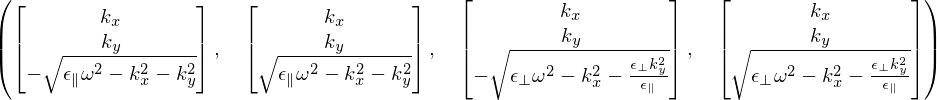

In [10]:
k_1, k_2, k_3, k_4

In [11]:
D = Matrix([[p_1[0], p_2[0], p_3[0], p_4[0]], 
            [q_1[1], q_2[1], q_3[1], q_4[1]], 
            [p_1[1], p_2[1], p_3[1], p_4[1]], 
            [q_1[0], q_2[0], q_3[0], q_4[0]]])                                                                                  

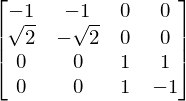

In [12]:
D.subs({kx:0, ky:0, ax:0, ay:1, az:0, eps_par:1, eps_per:2, c:1, w:1})

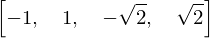

In [13]:
[S.subs({kx:0, ky:0, w:1, eps_par:2, eps_per:1}) for S in Sol]